<a href="https://colab.research.google.com/github/matan-michaely/Prediction_Of_Car_Accident_Severity/blob/main/HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00


In [5]:
# import nltk
# nltk.download("twitter_samples")
# from nltk.corpus import twitter_samples
from transformers import pipeline

# initialization of our classifier
classifier = pipeline(task="sentiment-analysis")

# # positive and negative tweets
# pos_tweets = twitter_samples.strings('positive_tweets.json')
# neg_tweets = twitter_samples.strings('negative_tweets.json')

# # function which calcualtes the classifier accuracy
# def calc_acc(result,target_label):
#   hits=0
#   for result_dict in result:
#     if result_dict["label"]==target_label:
#       hits+=1
#   return hits/len(result)

# # running classification for 100 first samples for both positive and negative tweets
# num_samples=100
# pos_result       = classifier(pos_tweets[:num_samples])
# pos_accuracy = calc_acc(pos_result,target_label='POSITIVE')
# print(f"the accuracy of this model regrading positive statements {pos_accuracy}")

# neg_result       = classifier(neg_tweets[:num_samples])
# neg_accuracy = calc_acc(neg_result,target_label='NEGATIVE')
# print(f"the accuracy of this model regrading negative statements {neg_accuracy}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [6]:
classifier("Im sometimes sad and sometime happy")

[{'label': 'POSITIVE', 'score': 0.9973184466362}]

In [ ]:
import nltk
nltk.download("twitter_samples")
from nltk.corpus import twitter_samples
from transformers import pipeline

# initialization of our classifier with specified model
classifier = pipeline(task="sentiment-analysis",model="cardiffnlp/twitter-roberta-base-sentiment")

# positive and negative tweets
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

# function which calcualtes the classifier accuracy
def calc_acc(result,target_label):
  hits=0
  for result_dict in result:
    if result_dict["label"]==target_label:
      hits+=1
  return hits/len(result)

# running classification for 100 first samples for both positive and negative tweets
num_samples=100
pos_result       = classifier(pos_tweets[:num_samples])
# LABEL_2 stands for positive sentiment
pos_accuracy = calc_acc(pos_result,target_label='LABEL_2')
print(f"the accuracy of this model regrading positive statements {pos_accuracy}")
# LABEL_0 stands for negative sentiment
neg_result       = classifier(neg_tweets[:num_samples])
neg_accuracy = calc_acc(neg_result,target_label='LABEL_0')
print(f"the accuracy of this model regrading negative statements {neg_accuracy}")

### Now let's dig in a bit about the underground of the pipeline exeuction
there four main steps :
1. preprocess of the raw sentence
2. tokenzier - dividing the sentence to words and encoding tokens to numeric values. (will show an example)
3. feed our model/network with the numeric values.
4. translate/decode the model output to requested target. (depends on our pipeline task )

In [ ]:
feature_extractor = pipeline("feature-extraction")
sentence    = "HelloWorld Hello World"
model_input = feature_extractor.preprocess(sentence)
print(model_input)
decoded = feature_extractor.tokenizer.convert_ids_to_tokens(
          model_input["input_ids"][0])
print(decoded)
print(sentence)




In [ ]:
import pandas as pd
features = feature_extractor(sentence)
token_features = pd.DataFrame(features[0],index=decoded)
print(token_features.shape)

sentence_features = token_features.mean(axis=0)
print(sentence_features.shape)

In [ ]:
classifier = pipeline("zero-shot-classification")

classifier("This lecture will be about advanced usage of neural networks using hugging face",
                        candidate_labels=["education", "politics", "sports"])

In [7]:
!pip install timm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.8 MB/s eta 0:00:00


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:332: UserWarning: Downcasting array dtype uint8 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

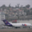

In [8]:
from datasets import load_dataset
dataset = load_dataset("cifar10")
# image of airplane
img   = dataset["train"][0]["img"]
display(img)

In [14]:
from transformers import pipeline
classifier = pipeline("image-classification")
# airplane image
img    = dataset["train"][0]["img"]
result = classifier(img)
result

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.988837718963623, 'label': 'airliner'},
 {'score': 0.0007289451896212995, 'label': 'wing'},
 {'score': 0.0004527703276835382, 'label': 'speedboat'},
 {'score': 0.00039493461372330785, 'label': 'space shuttle'},
 {'score': 0.00033421633997932076, 'label': 'warplane, military plane'}]

In [13]:
from transformers import pipeline

labels=["airplane",   #0
       "automobile",  #1
       "bird",        #2
       "cat",         #3
       "deer",        #4
       "dog",         #5
       "frog",        #6
       "horse",       #7
       "ship",        #8
       "truck"]       #9
# airplane image
img    = dataset["train"][0]["img"]
classifier = pipeline("zero-shot-image-classification")
result = classifier(images=img, candidate_labels=labels)
result

No model was supplied, defaulted to openai/clip-vit-base-patch32 and revision f4881ba (https://huggingface.co/openai/clip-vit-base-patch32).
Using a pipeline without specifying a model name and revision in production is not recommended.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.9744153022766113, 'label': 'airplane'},
 {'score': 0.012951483950018883, 'label': 'bird'},
 {'score': 0.008247992023825645, 'label': 'ship'},
 {'score': 0.0018931289669126272, 'label': 'automobile'},
 {'score': 0.0007023367215879261, 'label': 'dog'},
 {'score': 0.000607245892751962, 'label': 'truck'},
 {'score': 0.0004405988729558885, 'label': 'cat'},
 {'score': 0.00033803415135480464, 'label': 'deer'},
 {'score': 0.00031133031006902456, 'label': 'horse'},
 {'score': 9.24849882721901e-05, 'label': 'frog'}]

In [ ]:
from transformers import pipeline

labels=["airplane",   #0
       "automobile",  #1
       "bird",        #2
       "cat",         #3
       "deer",        #4
       "dog",         #5
       "frog",        #6
       "horse",       #7
       "ship",        #8
       "truck"]       #9

classifier = pipeline("image-classification")
img    = dataset["train"][0]["img"]
result = classifier(img)
result

RuntimeError: ignored

In [ ]:
classifier = pipeline("zero-shot-image-classification")
result = classifier(images=img, candidate_labels=labels)
result

### when we execute the last image classification model for many samples multiple times it will take long time to run , therefore we should use gpu for this case which is able to run more calculations in parallel and as a result will make the total execution time much faster

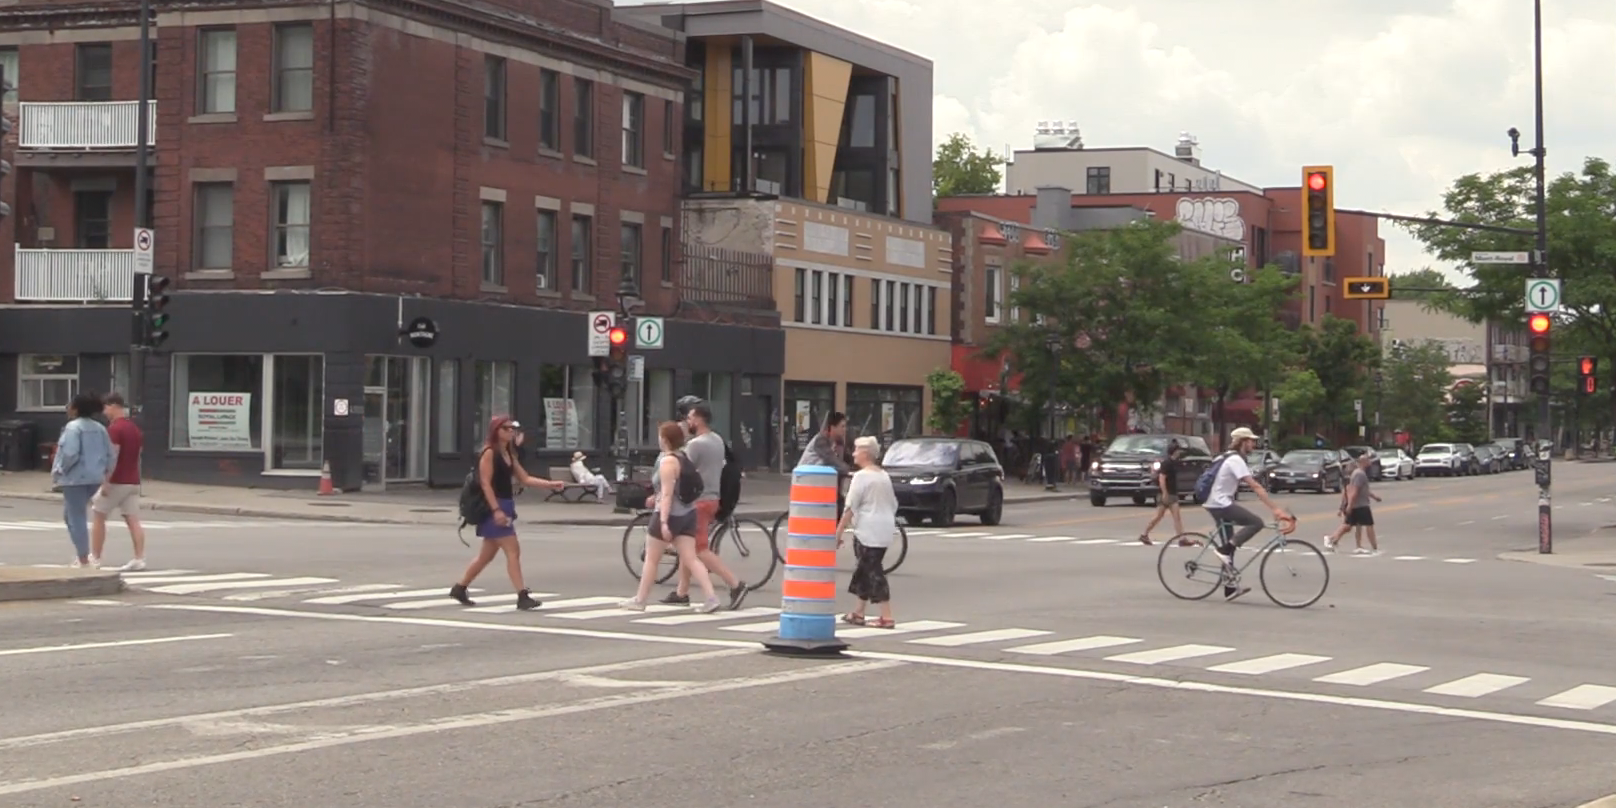

In [ ]:
from PIL import Image
img = Image.open("people_img_detection.png")
display(img)

In [ ]:
from transformers import pipeline
detector = pipeline("object-detection", model="facebook/detr-resnet-50")
result   = detector(img)
result

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Could not find image processor class in the image processor config or the model conf

[{'score': 0.9931963682174683,
  'label': 'person',
  'box': {'xmin': 86, 'ymin': 390, 'xmax': 147, 'ymax': 567}},
 {'score': 0.9956130981445312,
  'label': 'person',
  'box': {'xmin': 1321, 'ymin': 449, 'xmax': 1378, 'ymax': 552}},
 {'score': 0.962906002998352,
  'label': 'car',
  'box': {'xmin': 1374, 'ymin': 447, 'xmax': 1415, 'ymax': 480}},
 {'score': 0.9936315417289734,
  'label': 'traffic light',
  'box': {'xmin': 146, 'ymin': 275, 'xmax': 173, 'ymax': 341}},
 {'score': 0.9606177806854248,
  'label': 'traffic light',
  'box': {'xmin': 1580, 'ymin': 354, 'xmax': 1600, 'ymax': 392}},
 {'score': 0.9910154938697815,
  'label': 'person',
  'box': {'xmin': 1139, 'ymin': 439, 'xmax': 1199, 'ymax': 543}},
 {'score': 0.9896118640899658,
  'label': 'traffic light',
  'box': {'xmin': 1531, 'ymin': 308, 'xmax': 1561, 'ymax': 392}},
 {'score': 0.9247606992721558,
  'label': 'car',
  'box': {'xmin': 1456, 'ymin': 445, 'xmax': 1492, 'ymax': 475}},
 {'score': 0.9623691439628601,
  'label': 'car'

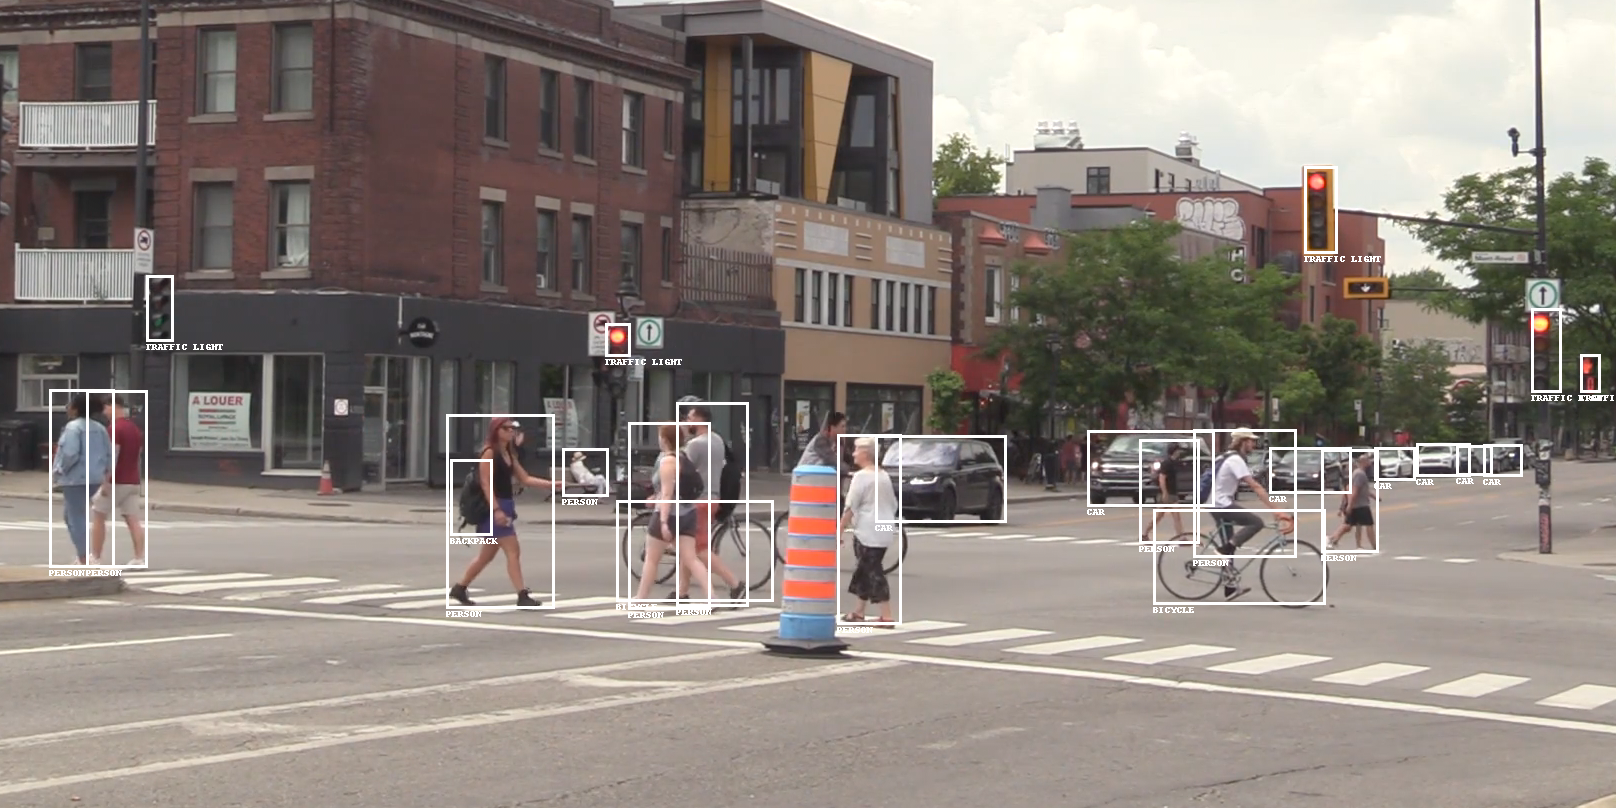

In [ ]:
from PIL import ImageDraw
d = ImageDraw.Draw(img)
for idx in range(len(result)):
  box = result[idx]["box"]
  xy  = (box["xmin"], box["ymin"], box["xmax"], box["ymax"])
  d.rectangle(xy=xy, fill=None, outline="white", width=3)

  label = result[idx]["label"].upper()
  d.text(xy=(box["xmin"],box["ymax"]), text=label,fill="white")
display(img)

In [ ]:
img     = Image.open("people_img_detection.png")
segment = pipeline("image-segmentation")
results  = segment(img)
results

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision fc15262 (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrFor

[{'score': 0.978239,
  'label': 'traffic light',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.95885,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.949443,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.982365,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.989901,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.959509,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.987486,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.973183,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.916498,
  'label': 'traffic light',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score': 0.993828,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1616x808>},
 {'score'

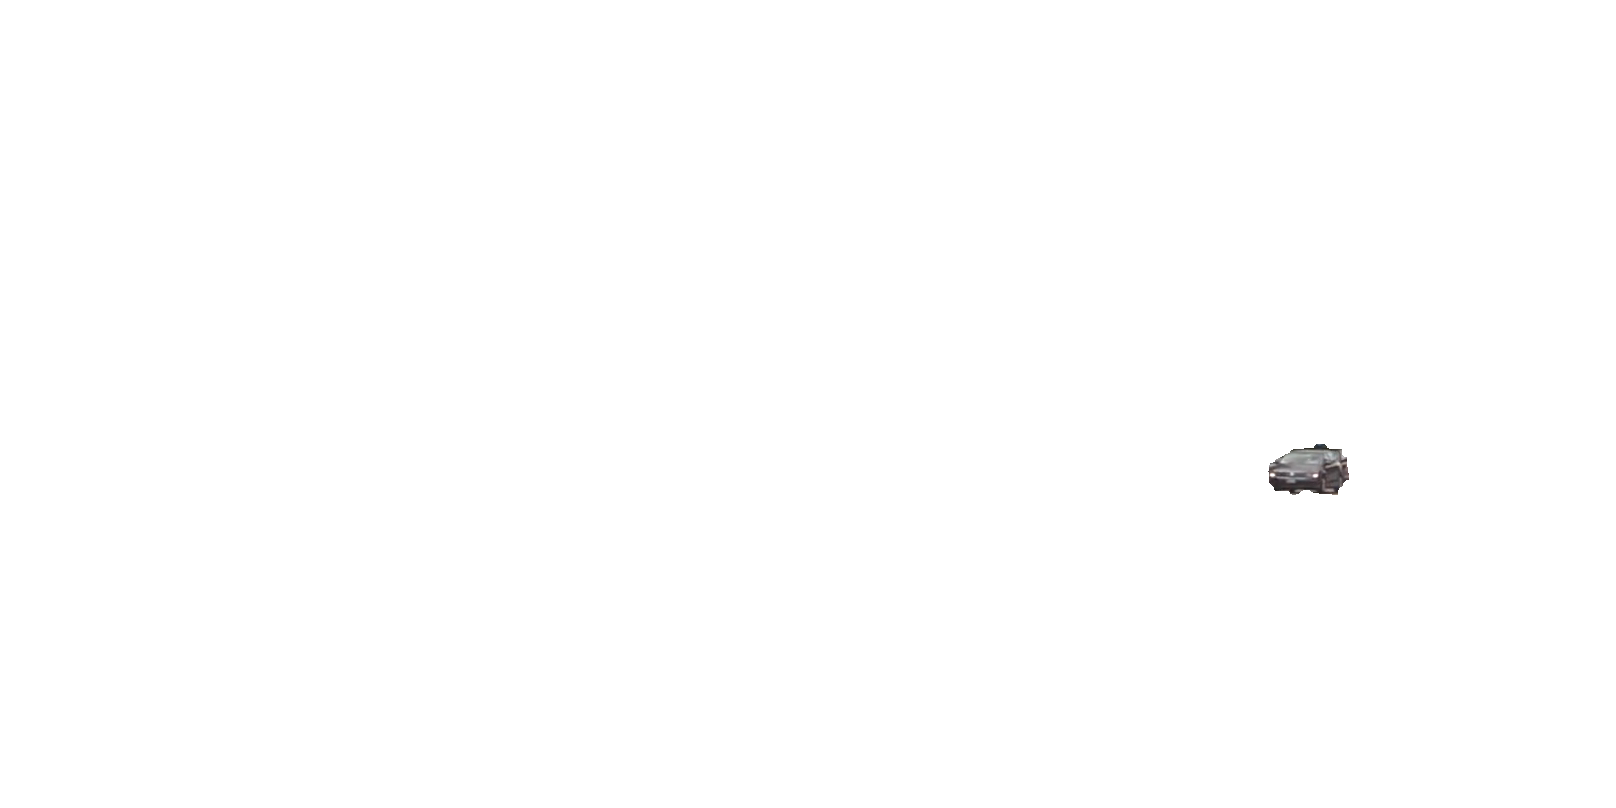

In [ ]:
car_mask = results[1]["mask"]
img.putalpha(car_mask)
display(img)

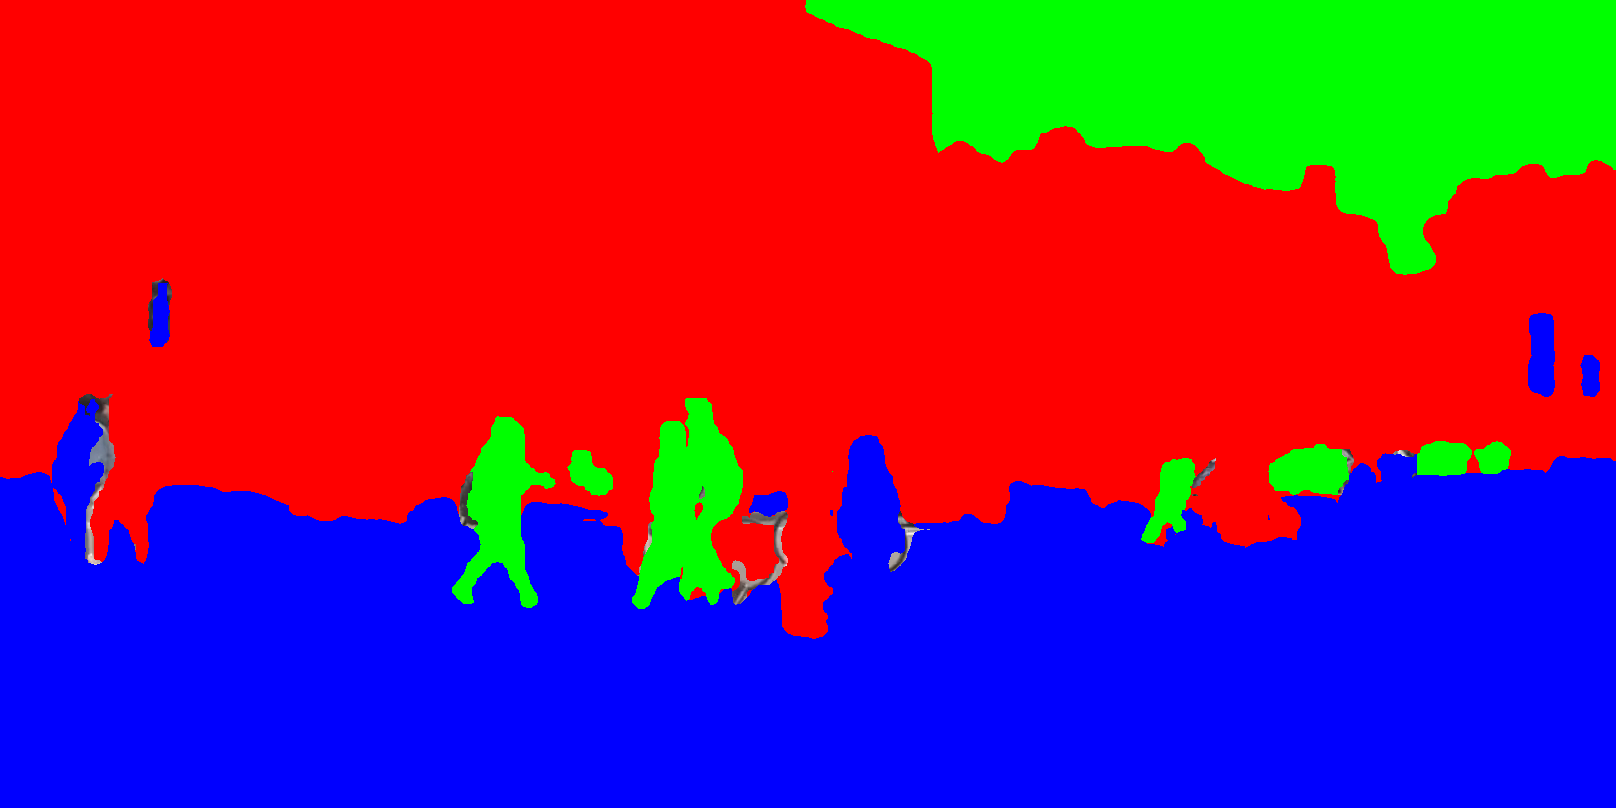

In [ ]:
from PIL import Image, ImageDraw

# Load your original image
original_image = Image.open('people_img_detection.png')

# Initialize an empty mask image of the same size as the original image
merged_mask = Image.new('L', original_image.size, 0)

# Define colors for different classes or instances
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Red, Green, Blue

# Iterate through the results, where each result contains a mask
for i, result in enumerate(results):
    # Extract the mask from the result
    mask = result['mask']

    # Overlay the mask on the merged mask image
    merged_mask.paste(mask, (0, 0), mask)

    # Create an ImageDraw object to draw on the original image
    draw = ImageDraw.Draw(original_image)

    # Define the color for this result
    color = colors[i % len(colors)]

    # Overlay the mask on the original image with the specified color
    original_image.paste(Image.new('RGB', original_image.size, color), mask=mask)

# Display or save the resulting image
display(original_image)


In [3]:
from datasets import load_dataset
dataset = load_dataset("food101")
# image of airplane
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 75750
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 25250
    })
})